# Нигматуллин А.Р. ИУ5-64Б. Вариант 12

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Импорт библиотек

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, balanced_accuracy_score

Загрузка и просмотр данных

In [56]:
data = pd.read_csv("dc-wikia-data.csv")

In [57]:
data.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.0,"1941, December",1941.0
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.0,"1941, November",1941.0
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.0,"1989, August",1989.0
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,1075.0,"1969, November",1969.0
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1028.0,"1956, October",1956.0


# Предобработка данных

In [58]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [59]:
data.shape

(6896, 13)

Проверка на наличие пропусков

In [60]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

Удаляем ненужные для задания поля

In [61]:
data2 = data.drop(["page_id", "name", "urlslug", "ID", "GSM"], axis=1)

In [62]:
data2.isnull().sum()

ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

Удаляем все строчки с пропусками из датасета

In [63]:
data3 = data2.dropna(axis=0)

In [64]:
data3.isnull().sum()

ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
dtype: int64

После удаления осталось достаточное количество строк в датасете

In [65]:
data3.shape

(2428, 8)

Преобразование категориальных значений в числовые

In [66]:
from sklearn.preprocessing import LabelEncoder

leType = LabelEncoder()
le_arr = leType.fit_transform(data3["ALIGN"])
data3["ALIGN"] = le_arr
data3["ALIGN"].unique()
data3 = data3.astype({"ALIGN":"int64"})

leContent = LabelEncoder()
le_arr = leContent.fit_transform(data3["EYE"])
data3["EYE"] = le_arr
data3["EYE"].unique()
data3 = data3.astype({"EYE":"int64"})

leCategory = LabelEncoder()
le_arr = leCategory.fit_transform(data3["HAIR"])
data3["HAIR"] = le_arr
data3["HAIR"].unique()
data3 = data3.astype({"HAIR":"int64"})

leGenres = LabelEncoder()
le_arr = leGenres.fit_transform(data3["SEX"])
data3["SEX"] = le_arr
data3["SEX"].unique()
data3 = data3.astype({"SEX":"int64"})

leSize = LabelEncoder()
le_arr = leSize.fit_transform(data3["ALIVE"])
data3["ALIVE"] = le_arr
data3["ALIVE"].unique()
data3 = data3.astype({"ALIVE":"int64"})

leDate = LabelEncoder()
le_arr = leDate.fit_transform(data3["FIRST APPEARANCE"])
data3["FIRST APPEARANCE"] = le_arr
data3["FIRST APPEARANCE"].unique()
data3 = data3.astype({"FIRST APPEARANCE":"int64"})

<ipython-input-66-531dc63fa0fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["ALIGN"] = le_arr


In [67]:
data3.shape

(2428, 8)

Полученный результат

In [68]:
data3.head()

,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1,2,0,2,1,3093.0,7,1939.0
1,1,2,0,2,1,2496.0,345,1986.0
2,1,3,3,2,1,1565.0,102,1959.0
3,1,3,16,2,1,1316.0,351,1987.0
4,1,2,0,2,1,1237.0,11,1940.0


Анализ корреляции признаков

<Axes: >

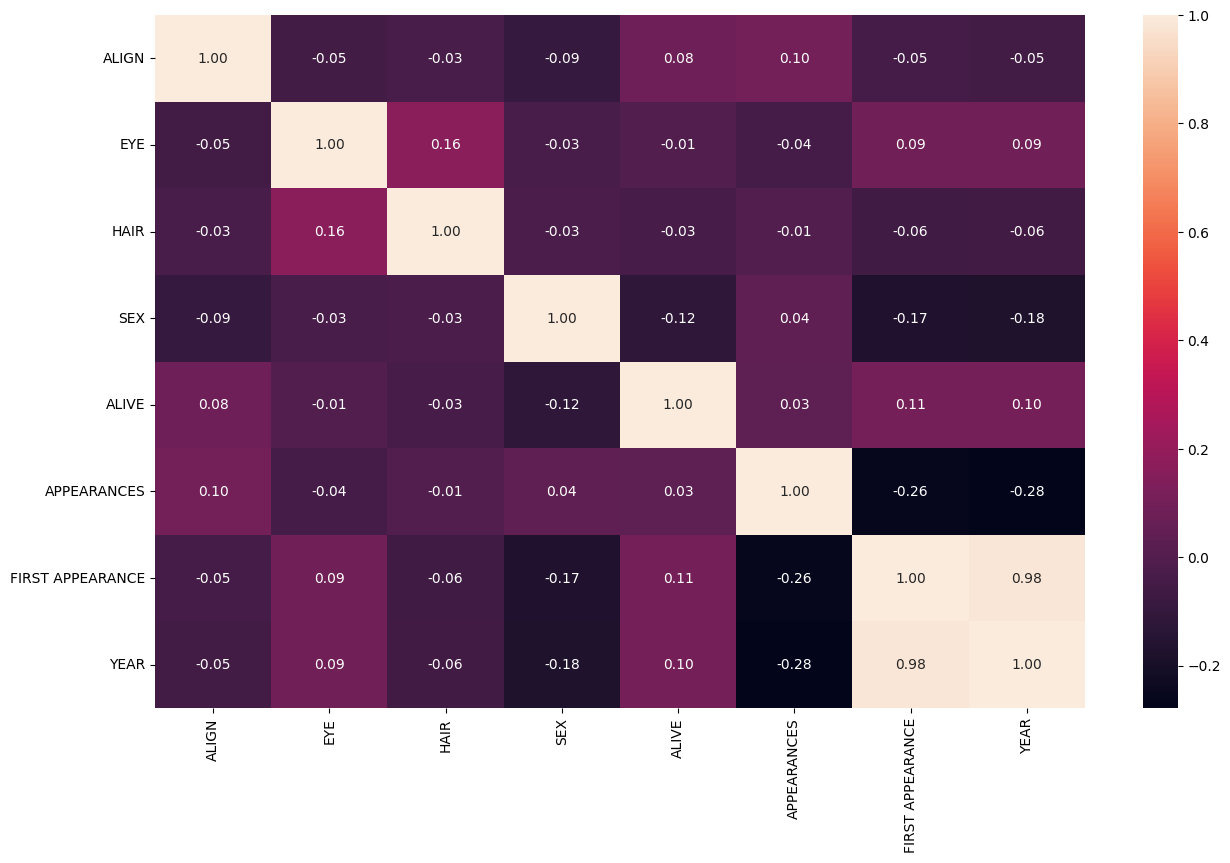

In [69]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data3.corr(method="pearson"), ax=ax, annot=True, fmt=".2f")

Проверка уникальных значений в столбцах датасета

In [70]:
data3['ALIVE'].unique()

array([1, 0])

In [71]:
data3['SEX'].unique()

array([2, 0, 1])

In [72]:
data3['ALIGN'].unique()

array([1, 2, 0, 3])

In [73]:
data3['HAIR'].unique()

array([ 0,  3, 16,  1, 11,  5, 14,  6, 13,  7, 10,  4,  2, 12,  8, 15,  9])

Разделение данных на обучающую и тестовую выборки

In [74]:
target="ALIGN"
xArray = data3.drop(target, axis=1)
yArray = data3[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

# Линейная регрессия

In [75]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

In [76]:
from sklearn.metrics import r2_score, mean_squared_error

R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

Для оценки качетсва модели будем использовать следующие метрики:

1) Коэффициента детерминации - чтобы определить насколько качественна модель для обучения. Коэффициент детерминации показывает долю вариации результативного признака, находящегося под воздействием изучаемых факторов, т. е. определяет, какая доля вариации признака Y учтена в модели и обусловлена влиянием на него факторов, включенных в модель. Чем ближе к r2 к 1, тем выше качество модели.

2) Корень из средней квадратичной ошибки - чтобы определить разброс ошибок в предсказании модели. RMSE - это способ измерения того, насколько хорошо наша прогностическая модель по сравнению с фактическими данными, чем меньше RMSE, тем лучше способ поведения модели

In [77]:
print("Коэфф. детерминации: {}".format(R2_LR))
print("Среднеквадратическая ошибка (RMSE): {}".format(RMSE_LR))

Коэфф. детерминации: 0.027130498108658863
Среднеквадратическая ошибка (RMSE): 0.3910985154007123


# Градиентный бустинг

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor(n_estimators=10, random_state=1)
GB.fit(trainX, trainY)

GradientBoostingRegressor(n_estimators=10, random_state=1)

In [79]:
R2_GB = r2_score(testY, GB.predict(testX))
RMSE_GB = mean_squared_error(testY, GB.predict(testX), squared=True)

In [80]:
print("Коэфф. детерминации: {}".format(R2_GB))
print("Среднеквадратическая ошибка (RMSE): {}".format(RMSE_GB))

Коэфф. детерминации: 0.031728661189752816
Среднеквадратическая ошибка (RMSE): 0.38925003032528327


## Вывод

Используя различные метрики, мы смогли получить полное понимание качества классификации. Результаты показывают, что градиентный бустинг более высокого качества и работает лучше по сравнению с линейной регрессией